# 2. 心电图处理
## 2.1 读取和展示心电图
data文件下存储了心电图，short类型，250Hz。要求用python打开该文件并画出心电图波形。



c:\Users\binguangyu\Desktop\HOMESVN\binguangyu\SmartHealth\python


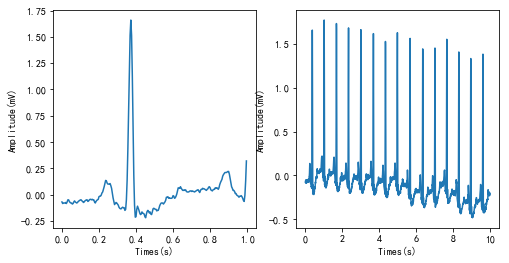

In [68]:
import numpy as np
import  os
import matplotlib.pyplot as plt
import math
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['figure.figsize'] = (8.0, 4.0) 
print(os.getcwd())
ecg = np.fromfile("../DATA/mitbd/234.dat",dtype = np.short)
ecg = ecg/gain
fs = 250
gain = 200

plt.subplot(1,2,1)
plt.plot(np.arange(0,fs)/fs,ecg[0:1*fs])
plt.xlabel('Times(s)')
plt.ylabel('Amplitude(mV)')
plt.subplot(1,2,2)
plt.plot(np.arange(0,10*fs)/fs,ecg[0:10*fs])
plt.xlabel('Times(s)')
plt.ylabel('Amplitude(mV)')
plt.rcParams['figure.figsize'] = (5.0, 3.0) 
plt.show()

## 2.2 QRS提取预处理
### 2.2.1 低通滤波
$$y(n) = 2y(n-1)-y(n-2)+x(n)-2x(n-6)+x(n-12)$$



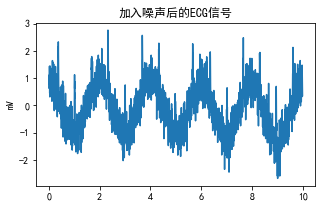

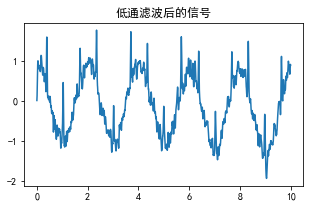

In [77]:

# step1
b = np.array([1,0,0,0,0,0,-2,0,0,0,0,0,1])/36
a = np.array([1,-2,1])
t = np.arange(0,len(ecg))
ecg_ns = ecg+ np.cos(2*3.1415926*0.5*t/250) + 0.4*np.random.randn(len(ecg))
ecg_lp = signal.lfilter(b, a, ecg_ns)
nsec_plt = 10

plt.plot(np.arange(0,nsec_plt*fs)/fs,ecg_ns[0:nsec_plt*fs])
plt.title('加入噪声后的ECG信号')
plt.ylabel('mV')
plt.show()

plt.title('低通滤波后的信号')
plt.plot(np.arange(0,nsec_plt*fs)/fs,ecg_lp[0:nsec_plt*fs])
plt.show()


### 2.2.2 高通滤波
$$y(n) = y(n-1) + x(n) - x(n-32)$$
$$z(n) = x(n-16) - y(n)/32$$

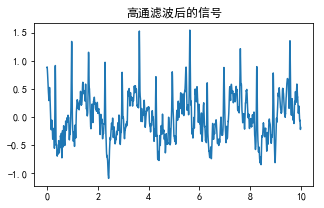

In [78]:
# step2
b = np.hstack((1,np.zeros((31,)), -1))
a = [1,-1]
y = signal.lfilter(b,a,ecg_lp)
ecg_hp = ecg_lp[16:]-y[1:-15]/32

plt.plot(np.arange(0,nsec_plt*fs)/fs,ecg_hp[0:nsec_plt*fs])
plt.title('高通滤波后的信号')
plt.show()

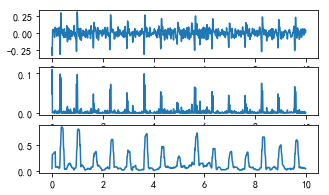

In [79]:


# step3
b = np.array([-2,-1, 0 ,1 ,2])/8
ecg_diff = signal.lfilter(b,1,ecg_hp)
# step4
ecg_squre = ecg_diff*ecg_diff
# step5
b = np.hstack((1,np.zeros((31,)), -1))
a = [1,-1]
ecg_mw = signal.lfilter(b,a,ecg_squre)
# plot
plt.subplot(3,1,1)
plt.plot(np.arange(0,nsec_plt*fs)/fs,ecg_diff[0:nsec_plt*fs])
plt.subplot(3,1,2)
plt.plot(np.arange(0,nsec_plt*fs)/fs,ecg_squre[0:nsec_plt*fs])
plt.subplot(3,1,3)
plt.plot(np.arange(0,nsec_plt*fs)/fs,ecg_mw[0:nsec_plt*fs])
plt.show()

## 2.3 心电信号预处理的C语言实现